<table align="left"  width="100%"> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="../images/qworld.jpg" width="35%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Maksim Dimitrijev (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\Y}{ \mymatrix{rr}{0 & -i \\ i & 0} } $ $ \newcommand{\S}{ \mymatrix{rr}{1 & 0 \\ 0 & i} } $ 
$ \newcommand{\T}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{i \frac{pi}{4}}} } $ 
$ \newcommand{\Sdg}{ \mymatrix{rr}{1 & 0 \\ 0 & -i} } $ 
$ \newcommand{\Tdg}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{-i \frac{pi}{4}}} } $

<h1> <font color="blue"> Solutions for </font> State representation conversion and visualization </h1>

<a id="task1"></a>
<h3> Task 1 </h3>

Implement a function in Python that takes quantum state $\alpha \ket{0} + \beta \ket{1}$ as two complex numbers $\alpha$ and $\beta$ and returns the angles $\theta$ and $\phi$ of the corresponding state $\ket{\psi} = \cos{\frac{\theta}{2}} \ket{0} + e^{i\phi} \sin{\frac{\theta}{2}} \ket{1}$.

Test it with the state $\frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}}i \ket{1}$.

<h3> Solution </h3>

In [7]:
from numpy import arcsin
from math import pi

def quantum_amplitudes_to_angles(alpha, beta):
    theta = 2*arcsin(abs(beta))
    if(alpha == 0 or beta == 0):
        phi = 0
    else:
        a_prime = alpha/abs(alpha)
        angle_lambda = arcsin(abs(a_prime.imag))
        if(a_prime.real < 0 and a_prime.imag >= 0):
            angle_lambda = pi - angle_lambda
        if(a_prime.real < 0 and a_prime.imag < 0):
            angle_lambda = pi + angle_lambda
        if(a_prime.real >= 0 and a_prime.imag < 0):
            angle_lambda = 2*pi - angle_lambda
        b_prime = beta/abs(beta)
        angle_nju = arcsin(abs(b_prime.imag))
        if(b_prime.real < 0 and b_prime.imag >= 0):
            angle_nju = pi - angle_nju
        if(b_prime.real < 0 and b_prime.imag < 0):
            angle_nju = pi + angle_nju
        if(b_prime.real >= 0 and b_prime.imag < 0):
            angle_nju = 2*pi - angle_nju
        phi = angle_nju - angle_lambda
    return [theta, phi]

In [8]:
# Test
print(quantum_amplitudes_to_angles(1/(2**0.5),complex(0,1/(2**0.5))))

[1.5707963267948963, 1.5707963267948966]


<a id="task2"></a>
<h3> Task 2 </h3>

Implement a function in Python that takes quantum state $\cos{\frac{\theta}{2}} \ket{0} + e^{i\phi} \sin{\frac{\theta}{2}} \ket{1}$ as two numbers $\frac{\theta}{2}$ and $\phi$ and returns the amplitudes $\alpha$ and $\beta$ of the corresponding state $\alpha \ket{0} + \beta \ket{1}$.

Test it with the state $\cos{\frac{\pi/2}{2}} \ket{0} + e^{i\frac{\pi}{2}} \sin{\frac{\pi/2}{2}} \ket{1}$.

<h3> Solution </h3>

In [9]:
from math import sin, cos
def quantum_angles_to_amplitudes(half_theta, phi):
    alpha = cos(half_theta)
    beta = sin(half_theta)*complex(cos(phi),sin(phi))
    return [alpha,beta]

In [10]:
# Test
print(quantum_angles_to_amplitudes((pi/2)/2,pi/2))

[0.7071067811865476, (4.329780281177466e-17+0.7071067811865475j)]


<a id="task3"></a>
<h3> Task 3 </h3>

Implement the code to visualize arbitrary state $\ket{\psi} = \cos{\frac{\theta}{2}} \ket{0} + e^{i\phi} \sin{\frac{\theta}{2}} \ket{1}$.

Test it with angles $\frac{\theta}{2} = \frac{\pi/2}{2}$ and $\phi = \frac{4\pi}{3}$.

<h3> Solution </h3>

In [11]:
from matplotlib.pyplot import figure,gca
from matplotlib.patches import Arc
from math import sin,cos,pi

%run qlatvia.py
%run drawing.py

def draw_quantum_angles(half_theta, phi):
    figure(figsize=(6,6), dpi=60)
    draw_real_part()
    gca().add_patch( Arc((0,0),2,2,angle=0,theta1=0,theta2=90,color="black",linewidth=2) )
    gca().add_patch( Arc((0,0),2,2,angle=0,theta1=0,theta2=half_theta,color="blue",linewidth=2) )
    x = cos(half_theta)
    y = sin(half_theta)
    draw_quantum_state(x,y,"|v>")
    
    draw_imaginary_part()
    gca().add_patch( Arc((0,0),2,2,angle=0,theta1=0,theta2=phi,color="blue",linewidth=2) )
    x = cos(phi)
    y = sin(phi)
    draw_quantum_state(x,y,"|v>")

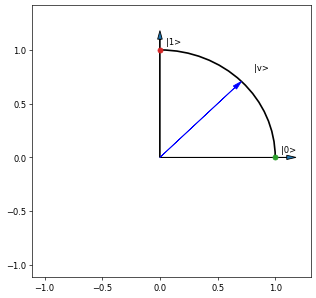

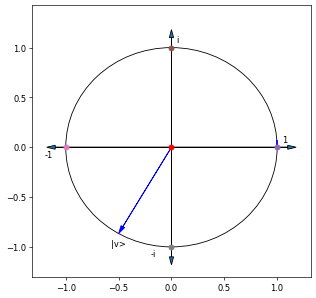

In [12]:
# Test
draw_quantum_angles((pi/2)/2, 4*pi/3)

<a id="task4"></a>
<h3> Task 4 </h3>

Implement the code to visualize arbitrary state $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$. You can do the conversion first, and then use the visualization from the previous task.

Test it with the state $\frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}}i \ket{1}$.

<h3> Solution </h3>

In [13]:
def draw_state(alpha, beta):
    angles = quantum_amplitudes_to_angles(alpha, beta)
    draw_quantum_angles(angles[0]/2, angles[1])

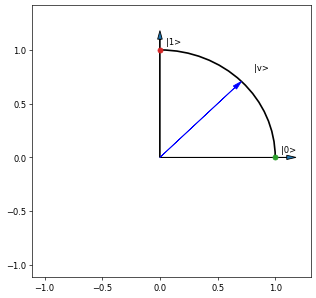

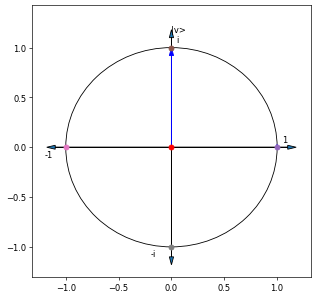

In [14]:
# Test
draw_state(1/(2**0.5),complex(0,1/(2**0.5)))